In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
train_set = pd.read_json('train.json')
train_set.drop(columns=['id'], inplace=True)
display(train_set.sample(5))
len(train_set)

,cuisine,ingredients
37850,mexican,"[banana leaves, snapper fillets, safflower oil..."
1120,russian,"[black pepper, whole milk, garlic cloves, toma..."
8034,french,"[sugar, cold water, armagnac, prunes, fresh or..."
34703,mexican,"[white onion, white hominy, tomatillos, dried ..."
17013,chinese,"[water, sesame oil, fresh spinach, reduced sod..."


39774

In [3]:
ing_col = train_set.ingredients.values
all_ings = np.concatenate(tuple(ing_col[i] for i in range(len(ing_col))))
unique_ings, counts = np.unique(all_ings, return_counts=True)
print('number of ingredients in dataset: ', len(all_ings))
print('unique number of ingredients in dataset: ', len(unique_ings))

number of ingredients in dataset:  428275
unique number of ingredients in dataset:  6714


In [4]:
ings=pd.DataFrame(all_ings, columns=["Ingredients"])
unique_in=ings.Ingredients.unique()

In [5]:
count_by_cuisine = train_set.groupby(['cuisine']).count()
count_by_cuisine

,ingredients
cuisine,
brazilian,467
british,804
cajun_creole,1546
chinese,2673
filipino,755
french,2646
greek,1175
indian,3003
irish,667


In [13]:
max(count_by_cuisine['ingredients'].values)/len(train_set)

0.19706340825665009

In [7]:
temp=pd.DataFrame(0, index= unique_in, columns= count_by_cuisine.index.values)
temp

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
romaine lettuce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
black olives,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
grape tomatoes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
garlic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pepper,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lipton® Iced Tea Brew Family Size Tea Bags,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lop chong,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tomato garlic pasta sauce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
k=0
for i in range(len(train_set)):
    for j in range(len(train_set.ingredients[i])):
        temp[train_set["cuisine"][i]][train_set.ingredients[i][j]]=temp[train_set["cuisine"][i]][train_set.ingredients[i][j]]+1
temp

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
romaine lettuce,0,0,12,13,0,12,39,3,1,33,0,0,5,103,0,0,8,4,20,17
black olives,0,0,2,0,0,21,31,0,0,67,0,0,0,92,8,1,3,4,0,0
grape tomatoes,0,0,5,2,1,13,26,5,0,98,0,1,0,53,0,0,14,6,4,0
garlic,82,34,370,763,325,214,216,726,51,1471,139,166,303,1317,143,20,259,128,414,239
pepper,56,88,189,158,199,209,203,205,87,965,125,62,99,806,94,59,549,133,81,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lipton® Iced Tea Brew Family Size Tea Bags,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
lop chong,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tomato garlic pasta sauce,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
temp[temp.sum(axis=1) > 4]

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
romaine lettuce,0,0,12,13,0,12,39,3,1,33,0,0,5,103,0,0,8,4,20,17
black olives,0,0,2,0,0,21,31,0,0,67,0,0,0,92,8,1,3,4,0,0
grape tomatoes,0,0,5,2,1,13,26,5,0,98,0,1,0,53,0,0,14,6,4,0
garlic,82,34,370,763,325,214,216,726,51,1471,139,166,303,1317,143,20,259,128,414,239
pepper,56,88,189,158,199,209,203,205,87,965,125,62,99,806,94,59,549,133,81,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loin pork chops,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0
vanilla pudding,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0
sago,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
mission figs,0,0,0,0,0,2,0,1,0,1,0,0,0,0,1,0,0,1,0,0


In [12]:
for i in range(0, 5000):
    print('ingredients that are present in more than ', i, ' recipe(s): ', len(temp[temp.sum(axis=1) > i]))

ingredients that are present in more than  0  recipe(s):  6714
ingredients that are present in more than  1  recipe(s):  4955
ingredients that are present in more than  2  recipe(s):  4159
ingredients that are present in more than  3  recipe(s):  3675
ingredients that are present in more than  4  recipe(s):  3337
ingredients that are present in more than  5  recipe(s):  3062
ingredients that are present in more than  6  recipe(s):  2841
ingredients that are present in more than  7  recipe(s):  2669
ingredients that are present in more than  8  recipe(s):  2536
ingredients that are present in more than  9  recipe(s):  2400
ingredients that are present in more than  10  recipe(s):  2272
ingredients that are present in more than  11  recipe(s):  2179
ingredients that are present in more than  12  recipe(s):  2097
ingredients that are present in more than  13  recipe(s):  2032
ingredients that are present in more than  14  recipe(s):  1962
ingredients that are present in more than  15  rec

ingredients that are present in more than  156  recipe(s):  475
ingredients that are present in more than  157  recipe(s):  470
ingredients that are present in more than  158  recipe(s):  467
ingredients that are present in more than  159  recipe(s):  462
ingredients that are present in more than  160  recipe(s):  460
ingredients that are present in more than  161  recipe(s):  458
ingredients that are present in more than  162  recipe(s):  458
ingredients that are present in more than  163  recipe(s):  456
ingredients that are present in more than  164  recipe(s):  453
ingredients that are present in more than  165  recipe(s):  451
ingredients that are present in more than  166  recipe(s):  451
ingredients that are present in more than  167  recipe(s):  447
ingredients that are present in more than  168  recipe(s):  446
ingredients that are present in more than  169  recipe(s):  442
ingredients that are present in more than  170  recipe(s):  441
ingredients that are present in more tha

ingredients that are present in more than  297  recipe(s):  272
ingredients that are present in more than  298  recipe(s):  270
ingredients that are present in more than  299  recipe(s):  269
ingredients that are present in more than  300  recipe(s):  268
ingredients that are present in more than  301  recipe(s):  268
ingredients that are present in more than  302  recipe(s):  266
ingredients that are present in more than  303  recipe(s):  266
ingredients that are present in more than  304  recipe(s):  266
ingredients that are present in more than  305  recipe(s):  266
ingredients that are present in more than  306  recipe(s):  264
ingredients that are present in more than  307  recipe(s):  263
ingredients that are present in more than  308  recipe(s):  263
ingredients that are present in more than  309  recipe(s):  262
ingredients that are present in more than  310  recipe(s):  262
ingredients that are present in more than  311  recipe(s):  261
ingredients that are present in more tha

ingredients that are present in more than  464  recipe(s):  162
ingredients that are present in more than  465  recipe(s):  162
ingredients that are present in more than  466  recipe(s):  162
ingredients that are present in more than  467  recipe(s):  161
ingredients that are present in more than  468  recipe(s):  161
ingredients that are present in more than  469  recipe(s):  161
ingredients that are present in more than  470  recipe(s):  160
ingredients that are present in more than  471  recipe(s):  160
ingredients that are present in more than  472  recipe(s):  159
ingredients that are present in more than  473  recipe(s):  157
ingredients that are present in more than  474  recipe(s):  157
ingredients that are present in more than  475  recipe(s):  156
ingredients that are present in more than  476  recipe(s):  156
ingredients that are present in more than  477  recipe(s):  156
ingredients that are present in more than  478  recipe(s):  156
ingredients that are present in more tha

ingredients that are present in more than  650  recipe(s):  122
ingredients that are present in more than  651  recipe(s):  122
ingredients that are present in more than  652  recipe(s):  122
ingredients that are present in more than  653  recipe(s):  122
ingredients that are present in more than  654  recipe(s):  122
ingredients that are present in more than  655  recipe(s):  122
ingredients that are present in more than  656  recipe(s):  122
ingredients that are present in more than  657  recipe(s):  122
ingredients that are present in more than  658  recipe(s):  122
ingredients that are present in more than  659  recipe(s):  122
ingredients that are present in more than  660  recipe(s):  122
ingredients that are present in more than  661  recipe(s):  122
ingredients that are present in more than  662  recipe(s):  122
ingredients that are present in more than  663  recipe(s):  122
ingredients that are present in more than  664  recipe(s):  122
ingredients that are present in more tha

ingredients that are present in more than  793  recipe(s):  105
ingredients that are present in more than  794  recipe(s):  105
ingredients that are present in more than  795  recipe(s):  105
ingredients that are present in more than  796  recipe(s):  104
ingredients that are present in more than  797  recipe(s):  104
ingredients that are present in more than  798  recipe(s):  104
ingredients that are present in more than  799  recipe(s):  104
ingredients that are present in more than  800  recipe(s):  104
ingredients that are present in more than  801  recipe(s):  104
ingredients that are present in more than  802  recipe(s):  104
ingredients that are present in more than  803  recipe(s):  104
ingredients that are present in more than  804  recipe(s):  104
ingredients that are present in more than  805  recipe(s):  104
ingredients that are present in more than  806  recipe(s):  104
ingredients that are present in more than  807  recipe(s):  104
ingredients that are present in more tha

ingredients that are present in more than  925  recipe(s):  87
ingredients that are present in more than  926  recipe(s):  87
ingredients that are present in more than  927  recipe(s):  87
ingredients that are present in more than  928  recipe(s):  87
ingredients that are present in more than  929  recipe(s):  87
ingredients that are present in more than  930  recipe(s):  87
ingredients that are present in more than  931  recipe(s):  87
ingredients that are present in more than  932  recipe(s):  87
ingredients that are present in more than  933  recipe(s):  87
ingredients that are present in more than  934  recipe(s):  87
ingredients that are present in more than  935  recipe(s):  86
ingredients that are present in more than  936  recipe(s):  86
ingredients that are present in more than  937  recipe(s):  86
ingredients that are present in more than  938  recipe(s):  86
ingredients that are present in more than  939  recipe(s):  86
ingredients that are present in more than  940  recipe(

ingredients that are present in more than  1062  recipe(s):  75
ingredients that are present in more than  1063  recipe(s):  75
ingredients that are present in more than  1064  recipe(s):  75
ingredients that are present in more than  1065  recipe(s):  75
ingredients that are present in more than  1066  recipe(s):  75
ingredients that are present in more than  1067  recipe(s):  75
ingredients that are present in more than  1068  recipe(s):  75
ingredients that are present in more than  1069  recipe(s):  75
ingredients that are present in more than  1070  recipe(s):  75
ingredients that are present in more than  1071  recipe(s):  75
ingredients that are present in more than  1072  recipe(s):  74
ingredients that are present in more than  1073  recipe(s):  74
ingredients that are present in more than  1074  recipe(s):  74
ingredients that are present in more than  1075  recipe(s):  74
ingredients that are present in more than  1076  recipe(s):  74
ingredients that are present in more tha

ingredients that are present in more than  1206  recipe(s):  63
ingredients that are present in more than  1207  recipe(s):  63
ingredients that are present in more than  1208  recipe(s):  63
ingredients that are present in more than  1209  recipe(s):  63
ingredients that are present in more than  1210  recipe(s):  63
ingredients that are present in more than  1211  recipe(s):  63
ingredients that are present in more than  1212  recipe(s):  63
ingredients that are present in more than  1213  recipe(s):  63
ingredients that are present in more than  1214  recipe(s):  63
ingredients that are present in more than  1215  recipe(s):  63
ingredients that are present in more than  1216  recipe(s):  63
ingredients that are present in more than  1217  recipe(s):  63
ingredients that are present in more than  1218  recipe(s):  61
ingredients that are present in more than  1219  recipe(s):  61
ingredients that are present in more than  1220  recipe(s):  61
ingredients that are present in more tha

ingredients that are present in more than  1354  recipe(s):  52
ingredients that are present in more than  1355  recipe(s):  52
ingredients that are present in more than  1356  recipe(s):  52
ingredients that are present in more than  1357  recipe(s):  52
ingredients that are present in more than  1358  recipe(s):  52
ingredients that are present in more than  1359  recipe(s):  52
ingredients that are present in more than  1360  recipe(s):  52
ingredients that are present in more than  1361  recipe(s):  52
ingredients that are present in more than  1362  recipe(s):  52
ingredients that are present in more than  1363  recipe(s):  52
ingredients that are present in more than  1364  recipe(s):  52
ingredients that are present in more than  1365  recipe(s):  52
ingredients that are present in more than  1366  recipe(s):  52
ingredients that are present in more than  1367  recipe(s):  52
ingredients that are present in more than  1368  recipe(s):  51
ingredients that are present in more tha

ingredients that are present in more than  1511  recipe(s):  44
ingredients that are present in more than  1512  recipe(s):  44
ingredients that are present in more than  1513  recipe(s):  44
ingredients that are present in more than  1514  recipe(s):  44
ingredients that are present in more than  1515  recipe(s):  44
ingredients that are present in more than  1516  recipe(s):  44
ingredients that are present in more than  1517  recipe(s):  44
ingredients that are present in more than  1518  recipe(s):  44
ingredients that are present in more than  1519  recipe(s):  44
ingredients that are present in more than  1520  recipe(s):  44
ingredients that are present in more than  1521  recipe(s):  44
ingredients that are present in more than  1522  recipe(s):  44
ingredients that are present in more than  1523  recipe(s):  43
ingredients that are present in more than  1524  recipe(s):  43
ingredients that are present in more than  1525  recipe(s):  43
ingredients that are present in more tha

ingredients that are present in more than  1653  recipe(s):  38
ingredients that are present in more than  1654  recipe(s):  38
ingredients that are present in more than  1655  recipe(s):  38
ingredients that are present in more than  1656  recipe(s):  38
ingredients that are present in more than  1657  recipe(s):  38
ingredients that are present in more than  1658  recipe(s):  38
ingredients that are present in more than  1659  recipe(s):  38
ingredients that are present in more than  1660  recipe(s):  38
ingredients that are present in more than  1661  recipe(s):  38
ingredients that are present in more than  1662  recipe(s):  38
ingredients that are present in more than  1663  recipe(s):  38
ingredients that are present in more than  1664  recipe(s):  38
ingredients that are present in more than  1665  recipe(s):  38
ingredients that are present in more than  1666  recipe(s):  38
ingredients that are present in more than  1667  recipe(s):  38
ingredients that are present in more tha

ingredients that are present in more than  1813  recipe(s):  30
ingredients that are present in more than  1814  recipe(s):  30
ingredients that are present in more than  1815  recipe(s):  30
ingredients that are present in more than  1816  recipe(s):  30
ingredients that are present in more than  1817  recipe(s):  30
ingredients that are present in more than  1818  recipe(s):  30
ingredients that are present in more than  1819  recipe(s):  30
ingredients that are present in more than  1820  recipe(s):  30
ingredients that are present in more than  1821  recipe(s):  30
ingredients that are present in more than  1822  recipe(s):  30
ingredients that are present in more than  1823  recipe(s):  30
ingredients that are present in more than  1824  recipe(s):  30
ingredients that are present in more than  1825  recipe(s):  30
ingredients that are present in more than  1826  recipe(s):  30
ingredients that are present in more than  1827  recipe(s):  30
ingredients that are present in more tha

ingredients that are present in more than  1970  recipe(s):  25
ingredients that are present in more than  1971  recipe(s):  25
ingredients that are present in more than  1972  recipe(s):  25
ingredients that are present in more than  1973  recipe(s):  25
ingredients that are present in more than  1974  recipe(s):  25
ingredients that are present in more than  1975  recipe(s):  25
ingredients that are present in more than  1976  recipe(s):  25
ingredients that are present in more than  1977  recipe(s):  25
ingredients that are present in more than  1978  recipe(s):  25
ingredients that are present in more than  1979  recipe(s):  25
ingredients that are present in more than  1980  recipe(s):  25
ingredients that are present in more than  1981  recipe(s):  25
ingredients that are present in more than  1982  recipe(s):  25
ingredients that are present in more than  1983  recipe(s):  25
ingredients that are present in more than  1984  recipe(s):  25
ingredients that are present in more tha

ingredients that are present in more than  2127  recipe(s):  24
ingredients that are present in more than  2128  recipe(s):  24
ingredients that are present in more than  2129  recipe(s):  24
ingredients that are present in more than  2130  recipe(s):  24
ingredients that are present in more than  2131  recipe(s):  24
ingredients that are present in more than  2132  recipe(s):  24
ingredients that are present in more than  2133  recipe(s):  24
ingredients that are present in more than  2134  recipe(s):  24
ingredients that are present in more than  2135  recipe(s):  24
ingredients that are present in more than  2136  recipe(s):  24
ingredients that are present in more than  2137  recipe(s):  24
ingredients that are present in more than  2138  recipe(s):  24
ingredients that are present in more than  2139  recipe(s):  24
ingredients that are present in more than  2140  recipe(s):  24
ingredients that are present in more than  2141  recipe(s):  24
ingredients that are present in more tha

ingredients that are present in more than  2287  recipe(s):  23
ingredients that are present in more than  2288  recipe(s):  23
ingredients that are present in more than  2289  recipe(s):  23
ingredients that are present in more than  2290  recipe(s):  23
ingredients that are present in more than  2291  recipe(s):  23
ingredients that are present in more than  2292  recipe(s):  23
ingredients that are present in more than  2293  recipe(s):  23
ingredients that are present in more than  2294  recipe(s):  23
ingredients that are present in more than  2295  recipe(s):  23
ingredients that are present in more than  2296  recipe(s):  23
ingredients that are present in more than  2297  recipe(s):  23
ingredients that are present in more than  2298  recipe(s):  23
ingredients that are present in more than  2299  recipe(s):  23
ingredients that are present in more than  2300  recipe(s):  23
ingredients that are present in more than  2301  recipe(s):  23
ingredients that are present in more tha

ingredients that are present in more than  2444  recipe(s):  23
ingredients that are present in more than  2445  recipe(s):  23
ingredients that are present in more than  2446  recipe(s):  23
ingredients that are present in more than  2447  recipe(s):  23
ingredients that are present in more than  2448  recipe(s):  23
ingredients that are present in more than  2449  recipe(s):  23
ingredients that are present in more than  2450  recipe(s):  23
ingredients that are present in more than  2451  recipe(s):  23
ingredients that are present in more than  2452  recipe(s):  23
ingredients that are present in more than  2453  recipe(s):  23
ingredients that are present in more than  2454  recipe(s):  23
ingredients that are present in more than  2455  recipe(s):  23
ingredients that are present in more than  2456  recipe(s):  23
ingredients that are present in more than  2457  recipe(s):  23
ingredients that are present in more than  2458  recipe(s):  23
ingredients that are present in more tha

ingredients that are present in more than  2599  recipe(s):  23
ingredients that are present in more than  2600  recipe(s):  23
ingredients that are present in more than  2601  recipe(s):  23
ingredients that are present in more than  2602  recipe(s):  23
ingredients that are present in more than  2603  recipe(s):  23
ingredients that are present in more than  2604  recipe(s):  23
ingredients that are present in more than  2605  recipe(s):  23
ingredients that are present in more than  2606  recipe(s):  23
ingredients that are present in more than  2607  recipe(s):  23
ingredients that are present in more than  2608  recipe(s):  23
ingredients that are present in more than  2609  recipe(s):  23
ingredients that are present in more than  2610  recipe(s):  23
ingredients that are present in more than  2611  recipe(s):  23
ingredients that are present in more than  2612  recipe(s):  23
ingredients that are present in more than  2613  recipe(s):  23
ingredients that are present in more tha

ingredients that are present in more than  2757  recipe(s):  20
ingredients that are present in more than  2758  recipe(s):  20
ingredients that are present in more than  2759  recipe(s):  20
ingredients that are present in more than  2760  recipe(s):  20
ingredients that are present in more than  2761  recipe(s):  20
ingredients that are present in more than  2762  recipe(s):  20
ingredients that are present in more than  2763  recipe(s):  20
ingredients that are present in more than  2764  recipe(s):  20
ingredients that are present in more than  2765  recipe(s):  20
ingredients that are present in more than  2766  recipe(s):  20
ingredients that are present in more than  2767  recipe(s):  20
ingredients that are present in more than  2768  recipe(s):  20
ingredients that are present in more than  2769  recipe(s):  20
ingredients that are present in more than  2770  recipe(s):  20
ingredients that are present in more than  2771  recipe(s):  20
ingredients that are present in more tha

ingredients that are present in more than  2903  recipe(s):  18
ingredients that are present in more than  2904  recipe(s):  18
ingredients that are present in more than  2905  recipe(s):  18
ingredients that are present in more than  2906  recipe(s):  18
ingredients that are present in more than  2907  recipe(s):  18
ingredients that are present in more than  2908  recipe(s):  18
ingredients that are present in more than  2909  recipe(s):  18
ingredients that are present in more than  2910  recipe(s):  18
ingredients that are present in more than  2911  recipe(s):  18
ingredients that are present in more than  2912  recipe(s):  18
ingredients that are present in more than  2913  recipe(s):  18
ingredients that are present in more than  2914  recipe(s):  18
ingredients that are present in more than  2915  recipe(s):  18
ingredients that are present in more than  2916  recipe(s):  18
ingredients that are present in more than  2917  recipe(s):  18
ingredients that are present in more tha

ingredients that are present in more than  3063  recipe(s):  16
ingredients that are present in more than  3064  recipe(s):  16
ingredients that are present in more than  3065  recipe(s):  16
ingredients that are present in more than  3066  recipe(s):  16
ingredients that are present in more than  3067  recipe(s):  16
ingredients that are present in more than  3068  recipe(s):  16
ingredients that are present in more than  3069  recipe(s):  16
ingredients that are present in more than  3070  recipe(s):  16
ingredients that are present in more than  3071  recipe(s):  16
ingredients that are present in more than  3072  recipe(s):  16
ingredients that are present in more than  3073  recipe(s):  16
ingredients that are present in more than  3074  recipe(s):  16
ingredients that are present in more than  3075  recipe(s):  16
ingredients that are present in more than  3076  recipe(s):  16
ingredients that are present in more than  3077  recipe(s):  16
ingredients that are present in more tha

ingredients that are present in more than  3219  recipe(s):  14
ingredients that are present in more than  3220  recipe(s):  14
ingredients that are present in more than  3221  recipe(s):  14
ingredients that are present in more than  3222  recipe(s):  14
ingredients that are present in more than  3223  recipe(s):  14
ingredients that are present in more than  3224  recipe(s):  14
ingredients that are present in more than  3225  recipe(s):  14
ingredients that are present in more than  3226  recipe(s):  14
ingredients that are present in more than  3227  recipe(s):  14
ingredients that are present in more than  3228  recipe(s):  14
ingredients that are present in more than  3229  recipe(s):  14
ingredients that are present in more than  3230  recipe(s):  14
ingredients that are present in more than  3231  recipe(s):  14
ingredients that are present in more than  3232  recipe(s):  14
ingredients that are present in more than  3233  recipe(s):  14
ingredients that are present in more tha

ingredients that are present in more than  3378  recipe(s):  13
ingredients that are present in more than  3379  recipe(s):  13
ingredients that are present in more than  3380  recipe(s):  13
ingredients that are present in more than  3381  recipe(s):  13
ingredients that are present in more than  3382  recipe(s):  13
ingredients that are present in more than  3383  recipe(s):  13
ingredients that are present in more than  3384  recipe(s):  13
ingredients that are present in more than  3385  recipe(s):  13
ingredients that are present in more than  3386  recipe(s):  13
ingredients that are present in more than  3387  recipe(s):  13
ingredients that are present in more than  3388  recipe(s):  12
ingredients that are present in more than  3389  recipe(s):  12
ingredients that are present in more than  3390  recipe(s):  12
ingredients that are present in more than  3391  recipe(s):  12
ingredients that are present in more than  3392  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  3529  recipe(s):  12
ingredients that are present in more than  3530  recipe(s):  12
ingredients that are present in more than  3531  recipe(s):  12
ingredients that are present in more than  3532  recipe(s):  12
ingredients that are present in more than  3533  recipe(s):  12
ingredients that are present in more than  3534  recipe(s):  12
ingredients that are present in more than  3535  recipe(s):  12
ingredients that are present in more than  3536  recipe(s):  12
ingredients that are present in more than  3537  recipe(s):  12
ingredients that are present in more than  3538  recipe(s):  12
ingredients that are present in more than  3539  recipe(s):  12
ingredients that are present in more than  3540  recipe(s):  12
ingredients that are present in more than  3541  recipe(s):  12
ingredients that are present in more than  3542  recipe(s):  12
ingredients that are present in more than  3543  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  3690  recipe(s):  12
ingredients that are present in more than  3691  recipe(s):  12
ingredients that are present in more than  3692  recipe(s):  12
ingredients that are present in more than  3693  recipe(s):  12
ingredients that are present in more than  3694  recipe(s):  12
ingredients that are present in more than  3695  recipe(s):  12
ingredients that are present in more than  3696  recipe(s):  12
ingredients that are present in more than  3697  recipe(s):  12
ingredients that are present in more than  3698  recipe(s):  12
ingredients that are present in more than  3699  recipe(s):  12
ingredients that are present in more than  3700  recipe(s):  12
ingredients that are present in more than  3701  recipe(s):  12
ingredients that are present in more than  3702  recipe(s):  12
ingredients that are present in more than  3703  recipe(s):  12
ingredients that are present in more than  3704  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  3850  recipe(s):  12
ingredients that are present in more than  3851  recipe(s):  12
ingredients that are present in more than  3852  recipe(s):  12
ingredients that are present in more than  3853  recipe(s):  12
ingredients that are present in more than  3854  recipe(s):  12
ingredients that are present in more than  3855  recipe(s):  12
ingredients that are present in more than  3856  recipe(s):  12
ingredients that are present in more than  3857  recipe(s):  12
ingredients that are present in more than  3858  recipe(s):  12
ingredients that are present in more than  3859  recipe(s):  12
ingredients that are present in more than  3860  recipe(s):  12
ingredients that are present in more than  3861  recipe(s):  12
ingredients that are present in more than  3862  recipe(s):  12
ingredients that are present in more than  3863  recipe(s):  12
ingredients that are present in more than  3864  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  4007  recipe(s):  12
ingredients that are present in more than  4008  recipe(s):  12
ingredients that are present in more than  4009  recipe(s):  12
ingredients that are present in more than  4010  recipe(s):  12
ingredients that are present in more than  4011  recipe(s):  12
ingredients that are present in more than  4012  recipe(s):  12
ingredients that are present in more than  4013  recipe(s):  12
ingredients that are present in more than  4014  recipe(s):  12
ingredients that are present in more than  4015  recipe(s):  12
ingredients that are present in more than  4016  recipe(s):  12
ingredients that are present in more than  4017  recipe(s):  12
ingredients that are present in more than  4018  recipe(s):  12
ingredients that are present in more than  4019  recipe(s):  12
ingredients that are present in more than  4020  recipe(s):  12
ingredients that are present in more than  4021  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  4156  recipe(s):  12
ingredients that are present in more than  4157  recipe(s):  12
ingredients that are present in more than  4158  recipe(s):  12
ingredients that are present in more than  4159  recipe(s):  12
ingredients that are present in more than  4160  recipe(s):  12
ingredients that are present in more than  4161  recipe(s):  12
ingredients that are present in more than  4162  recipe(s):  12
ingredients that are present in more than  4163  recipe(s):  12
ingredients that are present in more than  4164  recipe(s):  12
ingredients that are present in more than  4165  recipe(s):  12
ingredients that are present in more than  4166  recipe(s):  12
ingredients that are present in more than  4167  recipe(s):  12
ingredients that are present in more than  4168  recipe(s):  12
ingredients that are present in more than  4169  recipe(s):  12
ingredients that are present in more than  4170  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  4315  recipe(s):  12
ingredients that are present in more than  4316  recipe(s):  12
ingredients that are present in more than  4317  recipe(s):  12
ingredients that are present in more than  4318  recipe(s):  12
ingredients that are present in more than  4319  recipe(s):  12
ingredients that are present in more than  4320  recipe(s):  12
ingredients that are present in more than  4321  recipe(s):  12
ingredients that are present in more than  4322  recipe(s):  12
ingredients that are present in more than  4323  recipe(s):  12
ingredients that are present in more than  4324  recipe(s):  12
ingredients that are present in more than  4325  recipe(s):  12
ingredients that are present in more than  4326  recipe(s):  12
ingredients that are present in more than  4327  recipe(s):  12
ingredients that are present in more than  4328  recipe(s):  12
ingredients that are present in more than  4329  recipe(s):  12
ingredients that are present in more tha

ingredients that are present in more than  4472  recipe(s):  10
ingredients that are present in more than  4473  recipe(s):  10
ingredients that are present in more than  4474  recipe(s):  10
ingredients that are present in more than  4475  recipe(s):  10
ingredients that are present in more than  4476  recipe(s):  10
ingredients that are present in more than  4477  recipe(s):  10
ingredients that are present in more than  4478  recipe(s):  10
ingredients that are present in more than  4479  recipe(s):  10
ingredients that are present in more than  4480  recipe(s):  10
ingredients that are present in more than  4481  recipe(s):  10
ingredients that are present in more than  4482  recipe(s):  10
ingredients that are present in more than  4483  recipe(s):  10
ingredients that are present in more than  4484  recipe(s):  10
ingredients that are present in more than  4485  recipe(s):  10
ingredients that are present in more than  4486  recipe(s):  10
ingredients that are present in more tha

ingredients that are present in more than  4626  recipe(s):  10
ingredients that are present in more than  4627  recipe(s):  10
ingredients that are present in more than  4628  recipe(s):  10
ingredients that are present in more than  4629  recipe(s):  10
ingredients that are present in more than  4630  recipe(s):  10
ingredients that are present in more than  4631  recipe(s):  10
ingredients that are present in more than  4632  recipe(s):  9
ingredients that are present in more than  4633  recipe(s):  9
ingredients that are present in more than  4634  recipe(s):  9
ingredients that are present in more than  4635  recipe(s):  9
ingredients that are present in more than  4636  recipe(s):  9
ingredients that are present in more than  4637  recipe(s):  9
ingredients that are present in more than  4638  recipe(s):  9
ingredients that are present in more than  4639  recipe(s):  9
ingredients that are present in more than  4640  recipe(s):  9
ingredients that are present in more than  4641  

ingredients that are present in more than  4772  recipe(s):  9
ingredients that are present in more than  4773  recipe(s):  9
ingredients that are present in more than  4774  recipe(s):  9
ingredients that are present in more than  4775  recipe(s):  9
ingredients that are present in more than  4776  recipe(s):  9
ingredients that are present in more than  4777  recipe(s):  9
ingredients that are present in more than  4778  recipe(s):  9
ingredients that are present in more than  4779  recipe(s):  9
ingredients that are present in more than  4780  recipe(s):  9
ingredients that are present in more than  4781  recipe(s):  9
ingredients that are present in more than  4782  recipe(s):  9
ingredients that are present in more than  4783  recipe(s):  9
ingredients that are present in more than  4784  recipe(s):  9
ingredients that are present in more than  4785  recipe(s):  8
ingredients that are present in more than  4786  recipe(s):  8
ingredients that are present in more than  4787  recipe

ingredients that are present in more than  4905  recipe(s):  7
ingredients that are present in more than  4906  recipe(s):  7
ingredients that are present in more than  4907  recipe(s):  7
ingredients that are present in more than  4908  recipe(s):  7
ingredients that are present in more than  4909  recipe(s):  7
ingredients that are present in more than  4910  recipe(s):  7
ingredients that are present in more than  4911  recipe(s):  7
ingredients that are present in more than  4912  recipe(s):  7
ingredients that are present in more than  4913  recipe(s):  7
ingredients that are present in more than  4914  recipe(s):  7
ingredients that are present in more than  4915  recipe(s):  7
ingredients that are present in more than  4916  recipe(s):  7
ingredients that are present in more than  4917  recipe(s):  7
ingredients that are present in more than  4918  recipe(s):  7
ingredients that are present in more than  4919  recipe(s):  7
ingredients that are present in more than  4920  recipe

In [9]:
most_popular_ingredients = temp[temp.sum(axis=1) > 2000]
display(most_popular_ingredients)

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
garlic,82,34,370,763,325,214,216,726,51,1471,139,166,303,1317,143,20,259,128,414,239
pepper,56,88,189,158,199,209,203,205,87,965,125,62,99,806,94,59,549,133,81,71
salt,194,407,743,907,421,1203,572,1934,376,3454,332,422,253,2720,413,288,2290,460,396,264
tomatoes,63,8,115,22,54,129,156,521,7,601,37,36,1,871,74,22,115,151,52,23
ground black pepper,48,71,265,153,124,385,221,210,66,1444,89,72,92,577,147,53,465,149,50,104
eggs,52,191,87,288,93,185,80,81,90,627,41,144,105,326,33,112,622,88,106,37
milk,44,202,84,33,25,188,46,158,111,277,27,52,4,230,9,66,645,47,9,6
vegetable oil,43,58,245,602,95,102,29,593,43,253,96,245,120,775,40,69,451,46,335,145
soy sauce,1,2,12,1363,251,5,5,20,7,15,67,561,427,42,4,3,21,3,332,155
butter,48,222,334,43,60,514,90,273,219,1030,62,70,8,377,59,104,1255,45,24,11


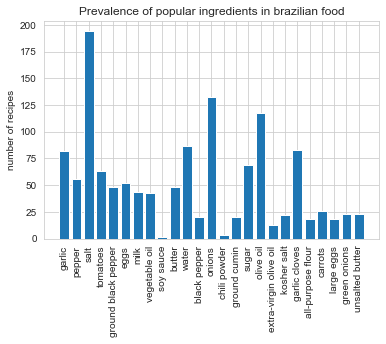

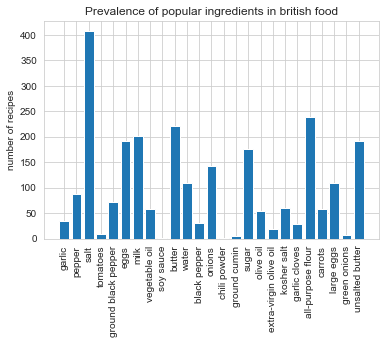

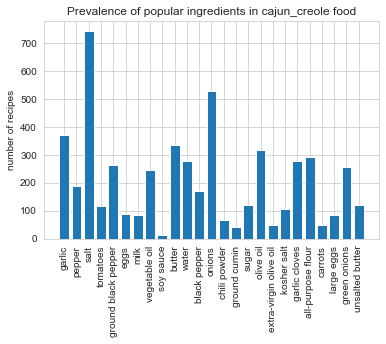

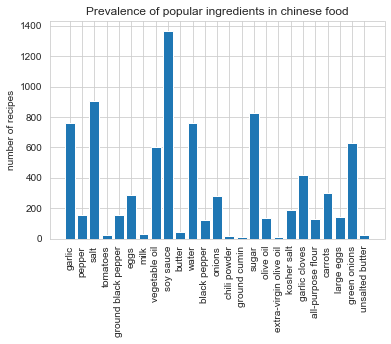

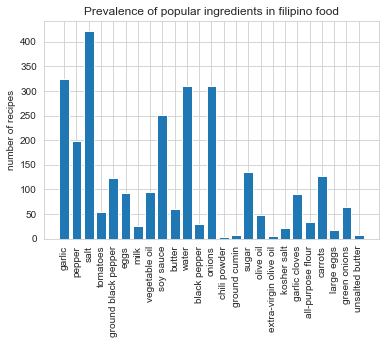

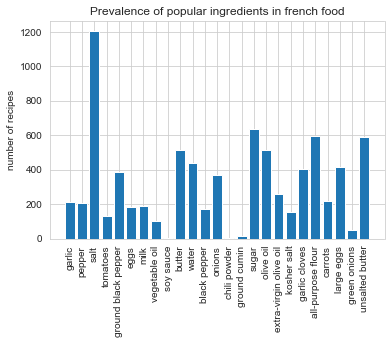

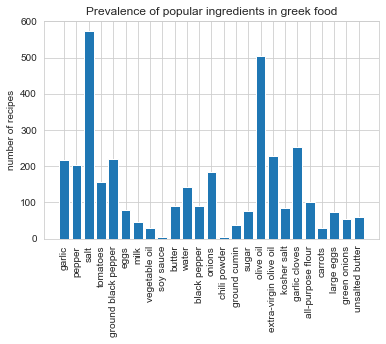

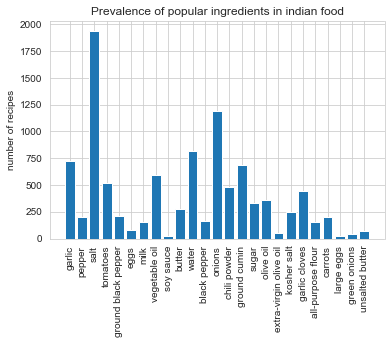

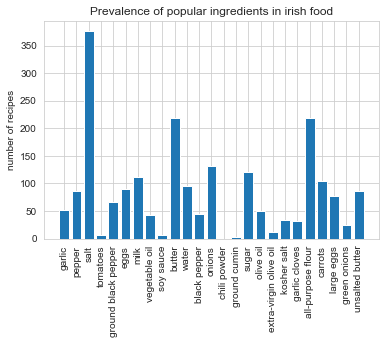

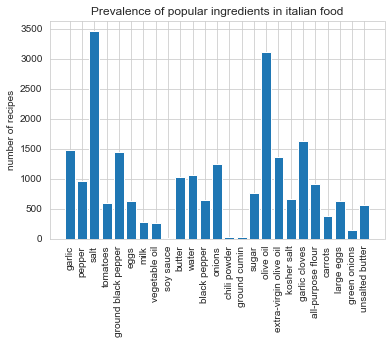

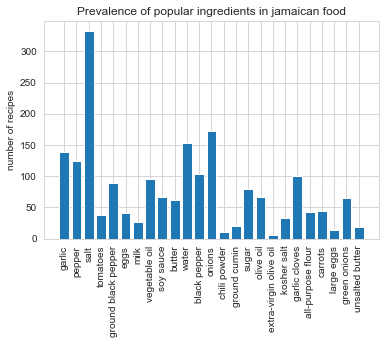

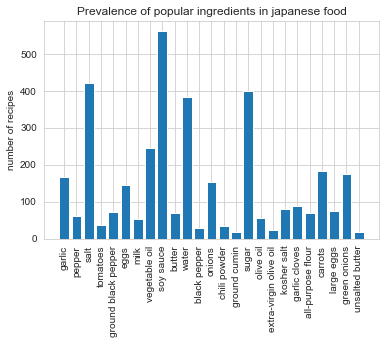

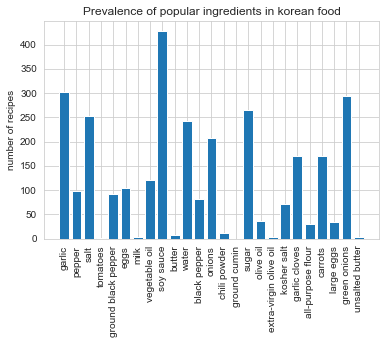

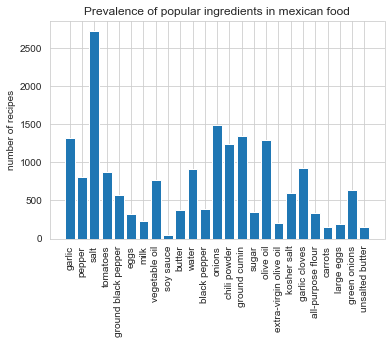

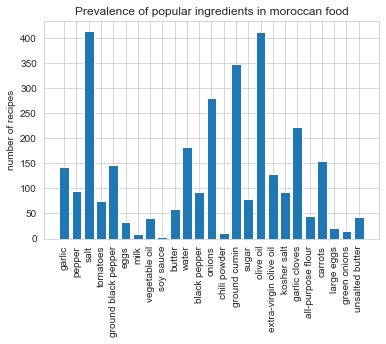

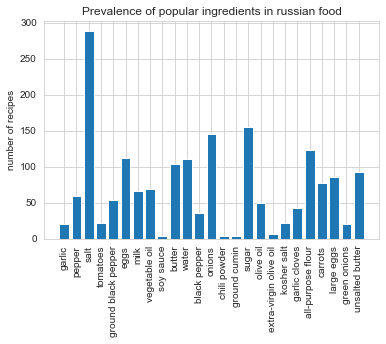

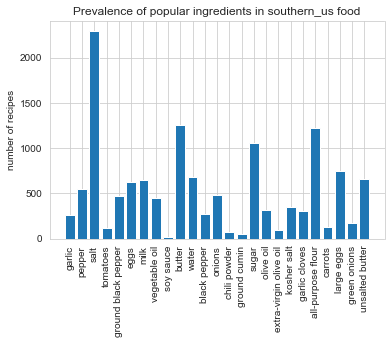

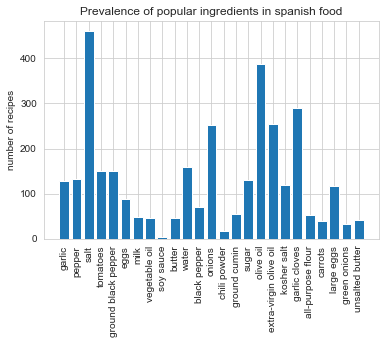

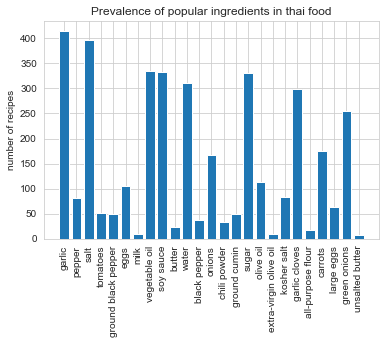

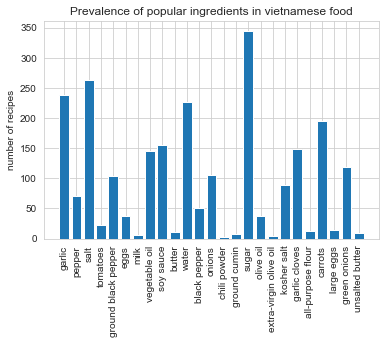

In [71]:
cuisines = count_by_cuisine.index.values
for cuisine in cuisines: 
    plt.figure()
    plt.title('Prevalence of popular ingredients in ' + cuisine + ' food')
    plt.bar(most_popular_ingredients.index.values, most_popular_ingredients[cuisine].values)
    plt.ylabel('number of recipes')
    plt.xticks(rotation='vertical')
    plt.show()

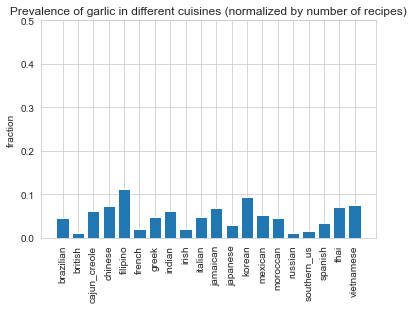

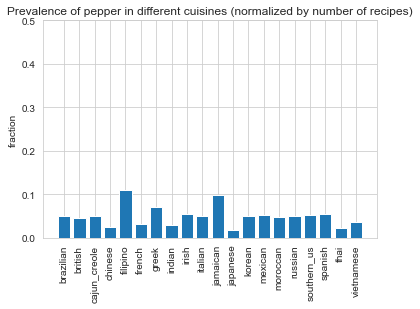

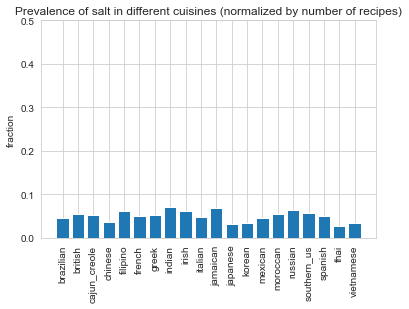

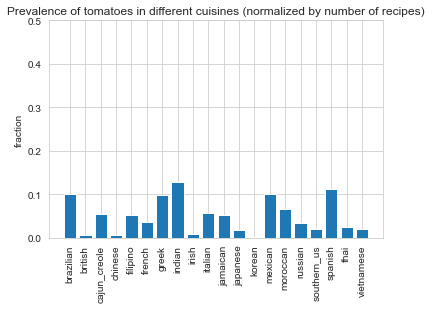

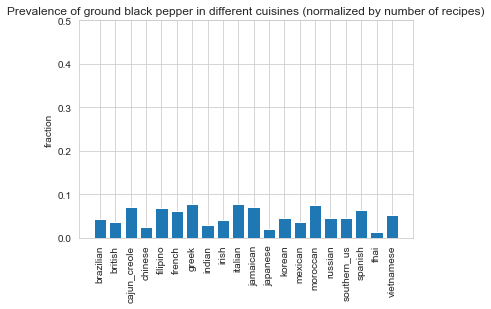

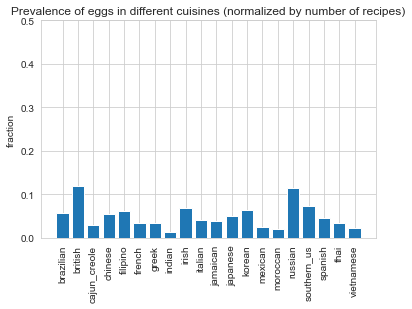

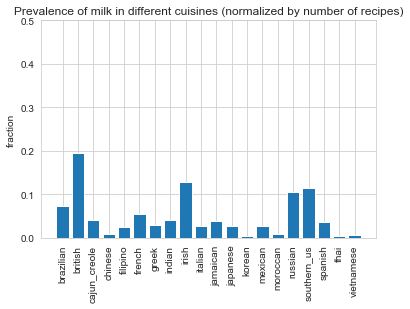

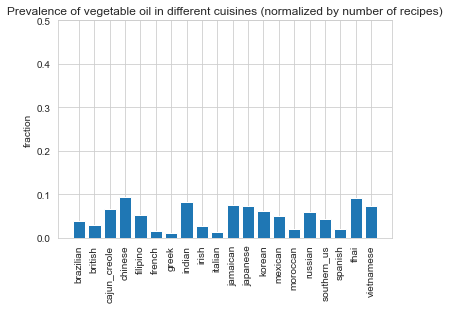

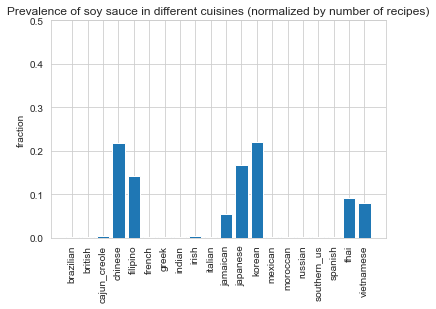

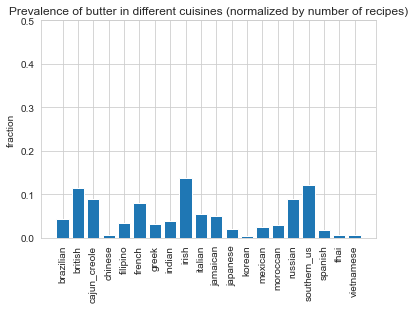

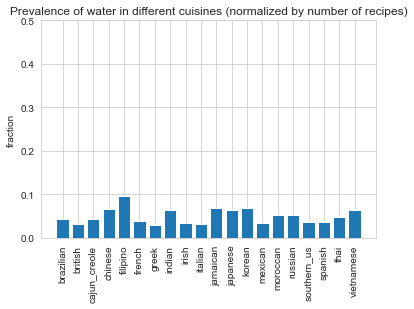

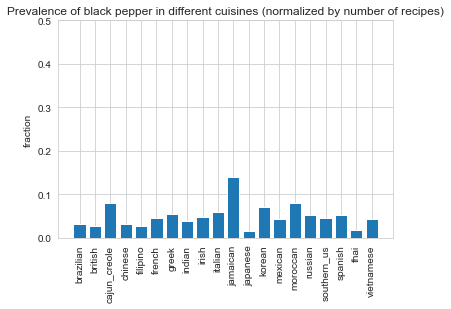

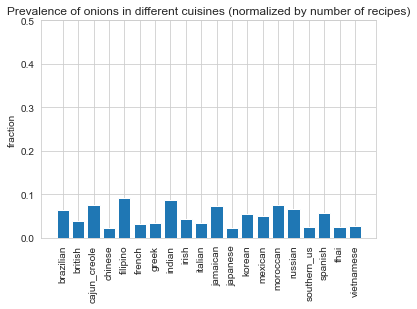

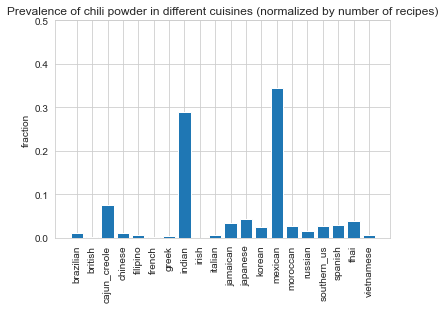

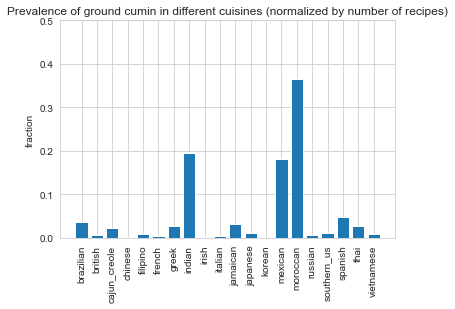

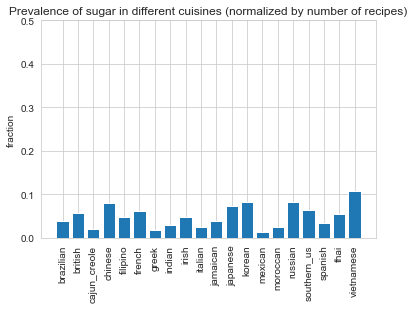

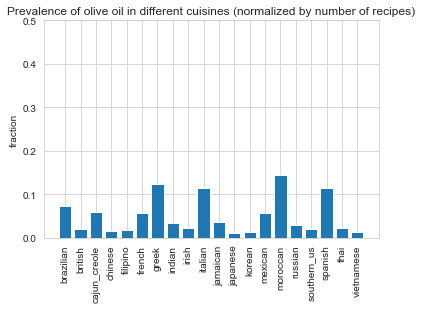

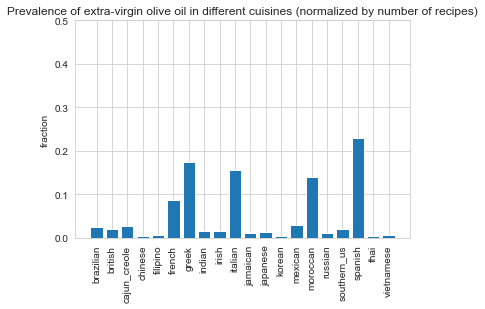

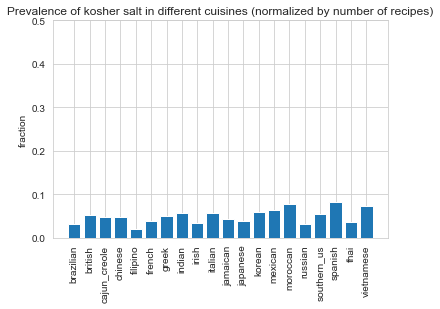

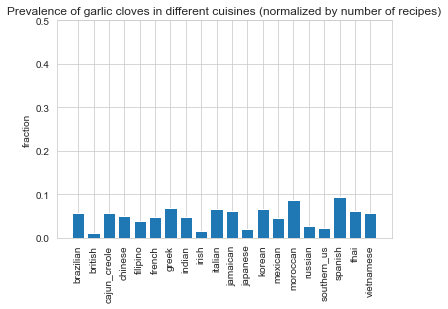

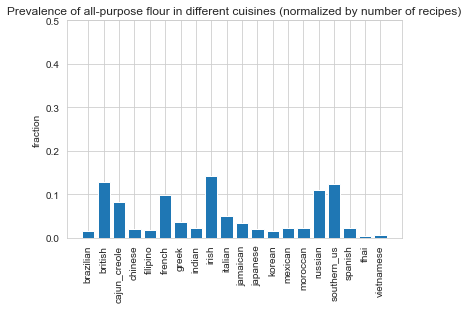

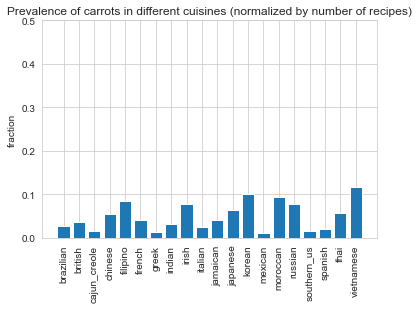

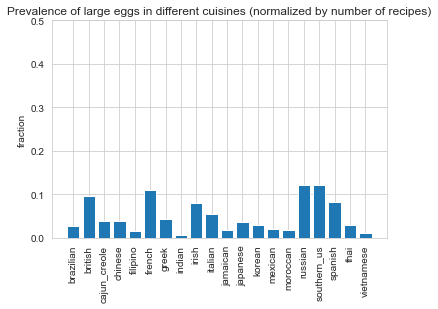

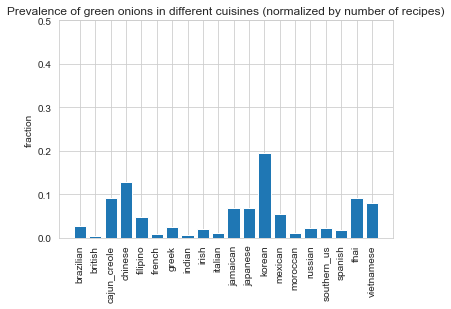

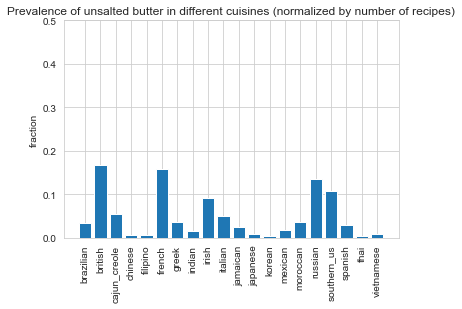

In [137]:
ingredients = most_popular_ingredients.index.values
for ingredient in ingredients: 
    plt.figure()
    plt.title('Prevalence of ' + ingredient + ' in different cuisines (normalized by number of recipes)')
    y = popular_ingredients.loc[[ingredient]].values.reshape(-1) / count_by_cuisine['ingredients'].values
    plt.bar(cuisines, y/np.sum(np.abs(y)))
    plt.ylabel('fraction')
    plt.ylim([0,0.5])
    plt.xticks(rotation='vertical')
    plt.show()

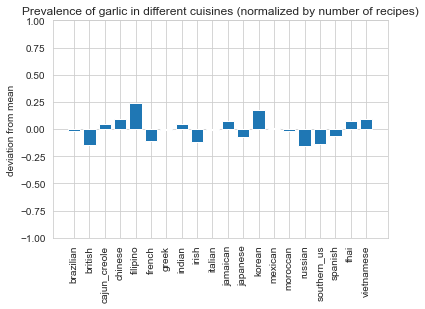

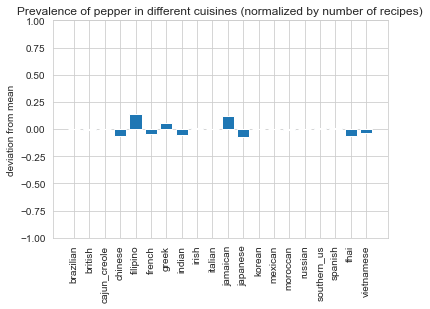

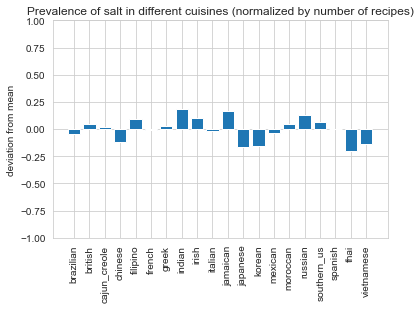

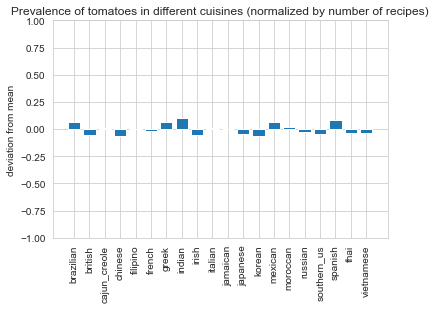

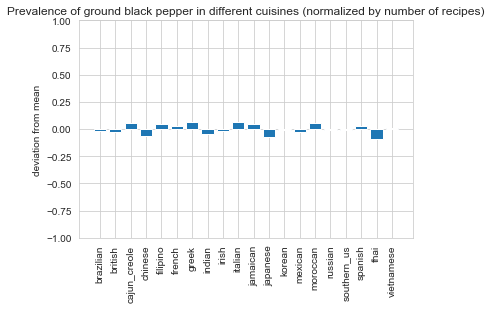

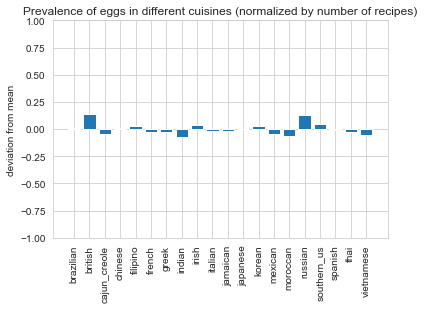

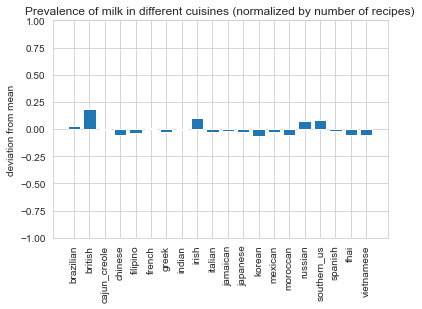

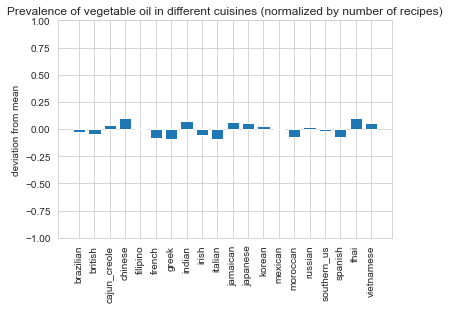

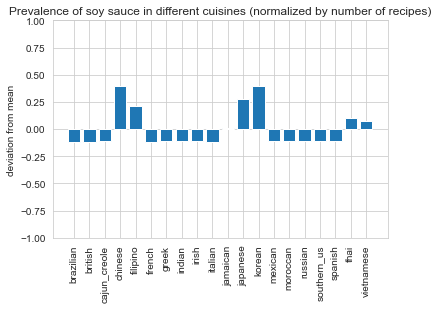

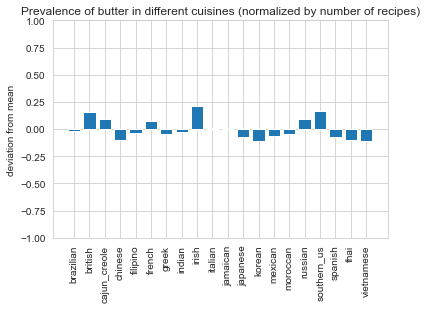

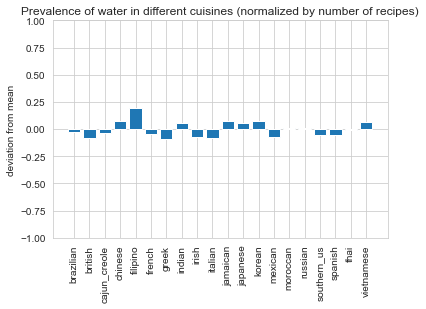

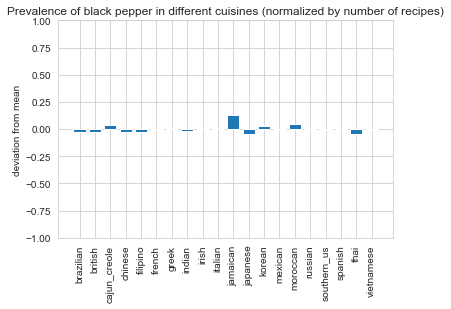

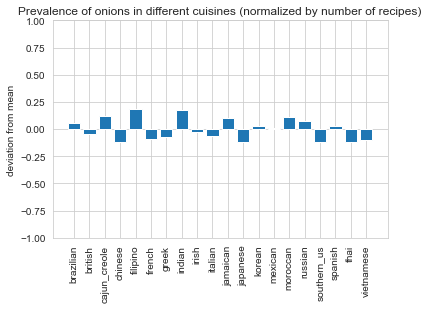

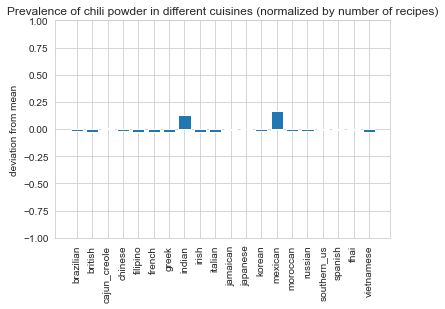

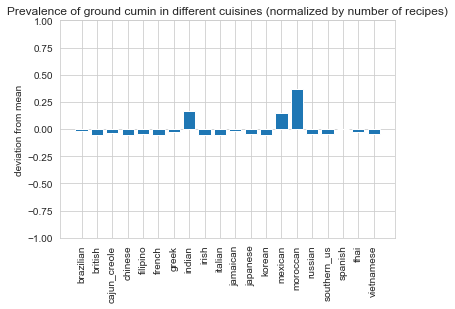

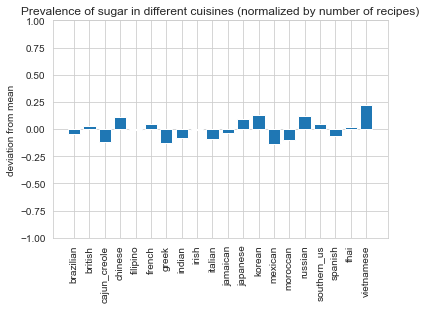

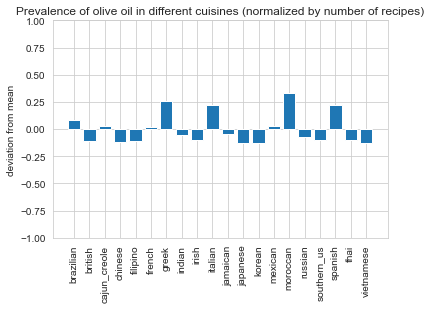

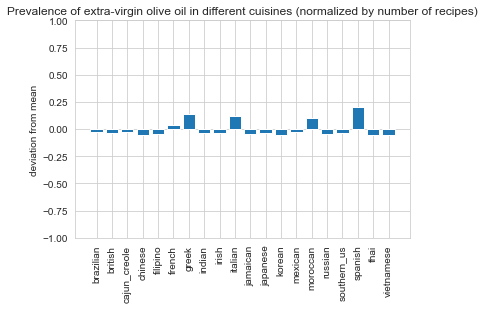

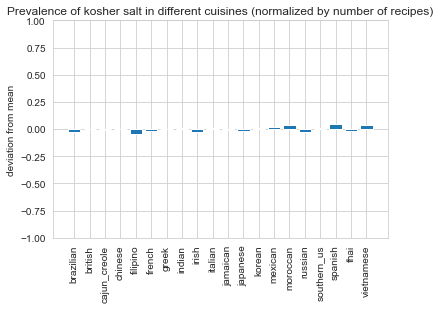

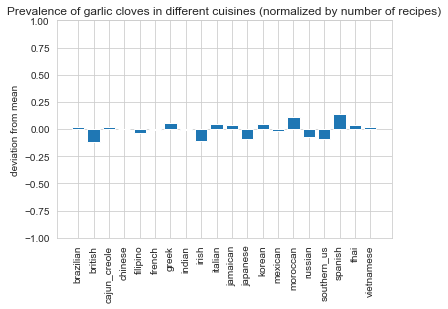

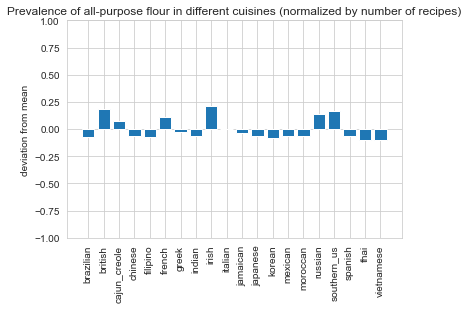

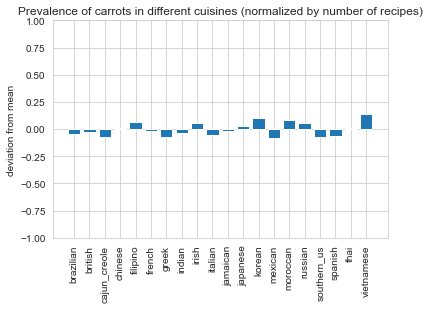

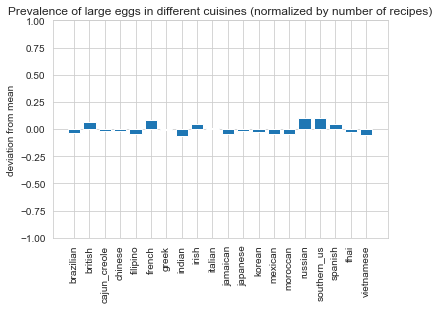

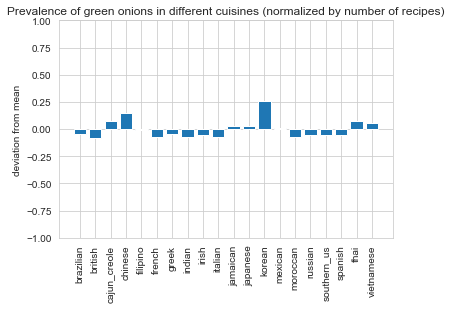

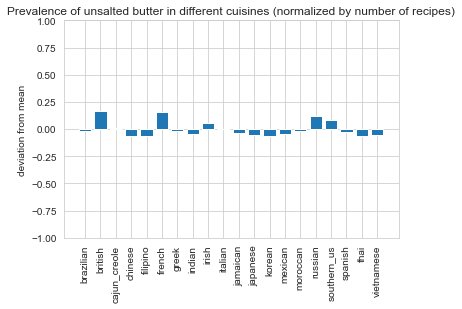

In [21]:
popular_ingredients = temp[temp.sum(axis=1) > 2000]
cuisines = count_by_cuisine.index.values
ingredients = popular_ingredients.index.values
difference_score = np.zeros(len(popular_ingredients))
max_residual = np.zeros(len(popular_ingredients))
variances = np.zeros(len(popular_ingredients))
stds = np.zeros(len(popular_ingredients))
i = 0
for ingredient in ingredients: 
    y = popular_ingredients.loc[[ingredient]].values.reshape(-1) / count_by_cuisine['ingredients'].values
    plt.figure()
    plt.title('Prevalence of ' + ingredient + ' in different cuisines (normalized by number of recipes)')  
    plt.bar(cuisines, y - np.mean(y))
    plt.ylabel('deviation from mean')
    plt.xticks(rotation='vertical')
    plt.ylim([-1,1])
    plt.show()
    difference_score[i] = np.sum(np.abs(y - np.mean(y)))/np.sum(np.abs(y))
    max_residual[i] = np.max(np.abs(y - np.mean(y)))/np.sum(np.abs(y))
    variances[i] = np.var(y)
    stds[i] = np.std(y) / np.sum(np.abs(y))
    i+=1

In [22]:
for i in range(len(popular_ingredients)):
    print('diff score for ', ingredients[i], ' is: ', difference_score[i])
    print('max score for ', ingredients[i], ' is: ', max_residual[i])
    print('variances for ', ingredients[i], ' is: ', variances[i])
    print('stds for ', ingredients[i], ' is: ', stds[i])

diff score for  garlic  is:  0.4426525492437166
max score for  garlic  is:  0.0615937777348819
variances for  garlic  is:  0.010987251556997117
stds for  garlic  is:  0.027173657952737646
diff score for  pepper  is:  0.2928385699406513
max score for  pepper  is:  0.05941480771685014
variances for  pepper  is:  0.0028692625277684483
stds for  pepper  is:  0.02223592087479028
diff score for  salt  is:  0.19387000524316447
max score for  salt  is:  0.022057663200440347
variances for  salt  is:  0.011999433159770182
stds for  salt  is:  0.011895604662139094
diff score for  tomatoes  is:  0.6484242723784243
max score for  tomatoes  is:  0.0785702050872892
variances for  tomatoes  is:  0.002702140803798097
stds for  tomatoes  is:  0.03852227554423055
diff score for  ground black pepper  is:  0.33448637833780176
max score for  ground black pepper  is:  0.03643608381902686
variances for  ground black pepper  is:  0.0021426858570347852
stds for  ground black pepper  is:  0.019325599024440664
di

In [23]:
n = 30
best_diff = ingredients[np.argsort(difference_score)][-n:]
best_max = ingredients[np.argsort(max_residual)][-n:]
best_var = ingredients[np.argsort(variances)][-n:]
best_stds = ingredients[np.argsort(stds)][-n:]
print(n, ' best ingredients from diff score: ', best_diff)
print(n, ' best ingredients from max score: ', best_max)
print(n, ' best ingredients from var score: ', best_var)
print(n, ' best ingredients from std score: ', best_stds)
print('overlap of 4 metrics: ', set(best_diff).intersection(best_max).intersection(best_var).intersection(best_stds))

30  best ingredients from diff score:  ['salt' 'kosher salt' 'water' 'pepper' 'ground black pepper'
 'garlic cloves' 'black pepper' 'onions' 'eggs' 'sugar' 'garlic'
 'vegetable oil' 'carrots' 'large eggs' 'tomatoes' 'butter' 'olive oil'
 'milk' 'green onions' 'all-purpose flour' 'unsalted butter'
 'extra-virgin olive oil' 'chili powder' 'ground cumin' 'soy sauce']
30  best ingredients from max score:  ['salt' 'kosher salt' 'ground black pepper' 'onions' 'garlic cloves'
 'vegetable oil' 'water' 'sugar' 'pepper' 'garlic' 'carrots' 'eggs'
 'large eggs' 'tomatoes' 'butter' 'black pepper' 'all-purpose flour'
 'olive oil' 'unsalted butter' 'green onions' 'milk' 'soy sauce'
 'extra-virgin olive oil' 'chili powder' 'ground cumin']
30  best ingredients from var score:  ['kosher salt' 'black pepper' 'ground black pepper' 'chili powder'
 'tomatoes' 'large eggs' 'pepper' 'eggs' 'milk' 'vegetable oil' 'carrots'
 'garlic cloves' 'unsalted butter' 'water' 'extra-virgin olive oil'
 'green onions' 'but

In [1]:
temp

NameError: name 'temp' is not defined

In [15]:
train_set['ingredients'][0].isin('romaine lettuce')

AttributeError: 'list' object has no attribute 'isin'

In [17]:
any('romaine lettuce' in t for t in train_set['ingredients'][0])

True

In [47]:
modified_train_set = train_set.copy()
modified_train_set.head(5)
best_ings = ['onion']

for ingredient in best_ings:
    modified_train_set[ingredient] = pd.Series([], dtype=int)
    for i in range(len(modified_train_set)):
        modified_train_set.loc[i, ingredient] = int(any(ingredient in recipe_ing for recipe_ing in modified_train_set.loc[i, 'ingredients']))
    modified_train_set[ingredient] = modified_train_set[ingredient].astype(int)
display(modified_train_set)

,cuisine,ingredients,onion
0,greek,"[romaine lettuce, black olives, grape tomatoes...",1
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",1
3,indian,"[water, vegetable oil, wheat, salt]",0
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",1
...,...,...,...
39769,irish,"[light brown sugar, granulated sugar, butter, ...",0
39770,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",1
39771,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0
39772,chinese,"[boneless chicken skinless thigh, minced garli...",0


In [64]:
modified_train_set.onion = modified_train_set.onion.astype(int)
modified_train_set.ingredients.values[0:20]

array([list(['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']),
       list(['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']),
       list(['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']),
       list(['water', 'vegetable oil', 'wheat', 'salt']),
       list(['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thigh', 'garam masala', 'double cream', 'natural yogurt', 'bay leaf']),
       list(['plain flour', 'sugar', 'butter', 'eggs', 'fresh ginger root', 'salt', 'ground cinnamon', 'milk', 'vanilla extract',

In [60]:
'tomato' in unique_ings[0:1]

False

In [89]:
ingreds = temp[temp.sum(axis=1) > 194].index.values
print(ingreds)

['romaine lettuce' 'black olives' 'grape tomatoes' 'garlic' 'pepper'
 'purple onion' 'feta cheese crumbles' 'ground pepper' 'salt' 'tomatoes'
 'ground black pepper' 'thyme' 'eggs' 'yellow corn meal' 'milk'
 'vegetable oil' 'mayonaise' 'cooking oil' 'green chilies' 'garlic powder'
 'yellow onion' 'soy sauce' 'butter' 'water' 'black pepper' 'shallots'
 'cayenne pepper' 'onions' 'garlic paste' 'lemon juice' 'chili powder'
 'oil' 'ground cumin' 'boneless chicken skinless thigh' 'garam masala'
 'bay leaf' 'sugar' 'fresh ginger root' 'ground cinnamon'
 'vanilla extract' 'ground ginger' 'powdered sugar' 'baking powder'
 'olive oil' 'medium shrimp' 'chopped cilantro' 'jalapeno chilies'
 'flat leaf parsley' 'white vinegar' 'sea salt' 'flour' 'pork'
 'corn tortillas' 'cheddar cheese' 'lime' 'chopped cilantro fresh'
 'chopped tomatoes' 'fresh basil' 'extra-virgin olive oil' 'kosher salt'
 'dried oregano' 'canola oil' 'mushrooms' 'low sodium soy sauce'
 'fresh ginger' 'green beans' 'white pepper' 

In [71]:
def contains(string, list):
    for word in list:
        if string in word:
            print(word)

In [88]:
contains('®', unique_ings)
contains('™', unique_ings)
print('--')
contains('milk', ingreds)

BACARDI® Mixers Margarita Mix
BACARDI® Superior
Bertolli® Alfredo Sauce
Bertolli® Arrabbiata Sauce
Bertolli® Classico Olive Oil
Best Foods® Real Mayonnaise
Breyers® Natural Vanilla Ice Cream
Country Crock® Spread
Crystal Farms® Shredded Cheddar Cheese
Diamond Crystal® Kosher Salt
Eggland's Best® eggs
Frank's® RedHot® Original Cayenne Pepper Sauce
Hellmann's® Real Mayonnaise
Hidden Valley® Farmhouse Originals Italian with Herbs Dressing
Hidden Valley® Greek Yogurt Original Ranch® Dip Mix
Hidden Valley® Original Ranch Salad® Dressing & Seasoning Mix
Hidden Valley® Original Ranch® Dips Mix
Hidden Valley® Original Ranch® Dressing
Hidden Valley® Original Ranch® Light Dressing
Hidden Valley® Original Ranch® Spicy Ranch Dressing
Honeysuckle White® Hot Italian Turkey Sausage Links
I Can't Believe It's Not Butter!® All Purpose Sticks
I Can't Believe It's Not Butter!® Spread
JOHNSONVILLE® Hot 'N Spicy Brats
Johnsonville® Mild Italian Ground Sausage
Jonshonville® Cajun Style Chicken Sausage
Knorr

In [96]:
contains('coriander', ingreds)

ground coriander
coriander
coriander seeds
coriander powder
fresh coriander


In [100]:
contains('garlic', ingreds)

garlic
garlic powder
garlic paste
garlic cloves
large garlic cloves
chopped garlic
minced garlic
garlic salt
